In [72]:
import pandas as pd

In [73]:
base = pd.read_excel("../../Bases/Base_tratada.xlsx")

In [74]:
base

,V0001,V0022,A02201|A02305|A02306,C00301,C004,C006,C008,C009,M01601,N010,...,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q074,Q092,Q11006,Q11604,IMC
0,reg1,4,1,4,5,2,19,4,6,1,...,0,Não pratica,1,13-16,Fuma atualmente,2,2,2,2,Sobrepeso
1,reg1,2,0,1,1,2,28,4,6,1,...,1,31-60,4,Nunca fumou,Nunca fumou,2,2,2,2,Abaixo do peso
2,reg1,4,1,2,2,2,38,1,6,1,...,0,Não pratica,2,21+,Fuma atualmente,2,2,2,2,Eitrófico
3,reg1,1,2,1,1,1,36,1,1,1,...,2,61-90,4,Nunca fumou,Nunca fumou,2,2,2,2,Sobrepeso
4,reg1,3,0,1,1,1,42,1,3,1,...,3,91-120,3,13-16,1-5,2,1,2,2,Sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,reg1,4,2,1,1,1,41,4,6,1,...,0,Não pratica,4,Nunca fumou,Nunca fumou,2,2,2,2,Sobrepeso
43012,reg1,3,0,1,1,1,21,2,6,1,...,0,Não pratica,1,13-16,Fuma atualmente,2,2,2,2,Eitrófico
43013,reg1,5,2,2,2,1,44,2,6,2,...,0,Não pratica,4,Nunca fumou,Nunca fumou,2,2,2,2,Eitrófico
43014,reg1,6,3,1,1,2,26,4,4,1,...,0,Não pratica,4,Nunca fumou,Nunca fumou,1,2,2,2,Obesidade grau 1


In [75]:
base['Q074'].value_counts()

Q074
2    40806
1     2210
Name: count, dtype: int64

## Codificação de atributos

In [76]:
mapeamento = {
    'reg1': 0,
    'reg2': 1,       
}

# Aplicar o mapeamento à coluna 'IMC'
base['V0001'] = base['V0001'].map(mapeamento)

In [77]:
mapeamento = {
    'Não pratica': 0,
    '<30': 1,       
    '31-60': 2,
    '61-90': 3,
    '91-120': 4
}

# Aplicar o mapeamento à coluna 'IMC'
base['P03701|P03702'] = base['P03701|P03702'].map(mapeamento)

In [78]:
mapeamento = {
    'Nunca fumou': 0,
    '<=12': 1,       
    '13-16': 2,
    '17-20': 3,
    '21+': 4
}

# Aplicar o mapeamento à coluna 'IMC'
base['P053'] = base['P053'].map(mapeamento)

In [79]:
base['P05901|P05902|P05903|P05904'].value_counts()

P05901|P05902|P05903|P05904
Nunca fumou        30407
Fuma atualmente     4652
5-15                2994
15+                 2837
1-5                 1721
Menos de 1 ano       405
Name: count, dtype: int64

In [80]:
mapeamento = {
    'Fuma atualmente': 0,
    'Nunca fumou': 1,
    'Menos de 1 ano': 2,
    '1-5': 3,       
    '5-15': 4,
    '15+': 5,
}

# Aplicar o mapeamento à coluna 'IMC'
base['P05901|P05902|P05903|P05904'] = base['P05901|P05902|P05903|P05904'].map(mapeamento)

In [81]:
mapeamento_imc = {
    'Abaixo do peso': 0,
    'Eitrófico': 1,      
    'Sobrepeso': 2,
    'Obesidade grau 1': 3,
    'Obesidade grau 2': 4,
    'Obesidade grau 3': 5 
}

# Aplicar o mapeamento à coluna 'IMC'
base['IMC'] = base['IMC'].map(mapeamento_imc)

In [82]:
base

,V0001,V0022,A02201|A02305|A02306,C00301,C004,C006,C008,C009,M01601,N010,...,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q074,Q092,Q11006,Q11604,IMC
0,0,4,1,4,5,2,19,4,6,1,...,0,0,1,2,0,2,2,2,2,2
1,0,2,0,1,1,2,28,4,6,1,...,1,2,4,0,1,2,2,2,2,0
2,0,4,1,2,2,2,38,1,6,1,...,0,0,2,4,0,2,2,2,2,1
3,0,1,2,1,1,1,36,1,1,1,...,2,3,4,0,1,2,2,2,2,2
4,0,3,0,1,1,1,42,1,3,1,...,3,4,3,2,3,2,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,0,4,2,1,1,1,41,4,6,1,...,0,0,4,0,1,2,2,2,2,2
43012,0,3,0,1,1,1,21,2,6,1,...,0,0,1,2,0,2,2,2,2,1
43013,0,5,2,2,2,1,44,2,6,2,...,0,0,4,0,1,2,2,2,2,1
43014,0,6,3,1,1,2,26,4,4,1,...,0,0,4,0,1,1,2,2,2,3


## Correlação

In [83]:
import seaborn as sns

<AxesSubplot: >

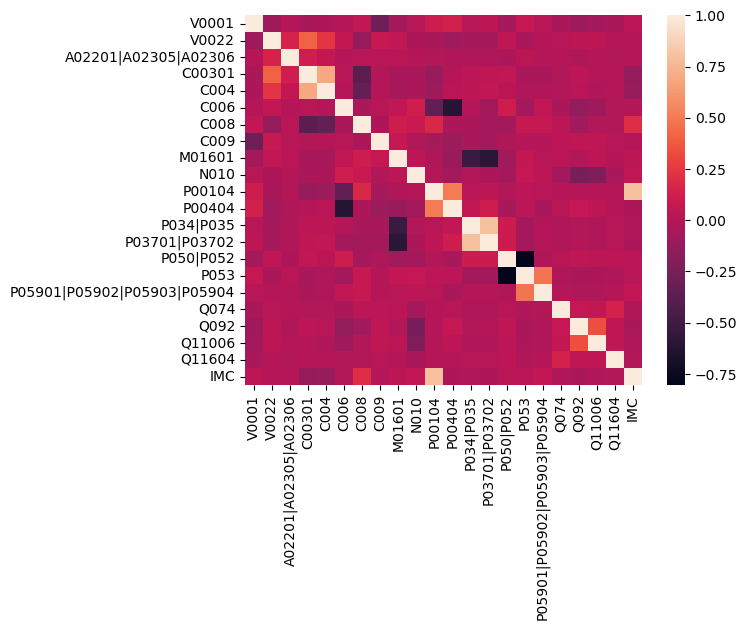

In [84]:
sns.heatmap(base.corr())

## Valores Duplicados

In [85]:
base.drop_duplicates(inplace=True)

## Separação dos valores de treino e teste

In [86]:
X_prev = base.drop(columns=['Q074'])
y_classe = base['Q074']

In [87]:
X_prev

,V0001,V0022,A02201|A02305|A02306,C00301,C004,C006,C008,C009,M01601,N010,...,P00404,P034|P035,P03701|P03702,P050|P052,P053,P05901|P05902|P05903|P05904,Q092,Q11006,Q11604,IMC
0,0,4,1,4,5,2,19,4,6,1,...,152.0,0,0,1,2,0,2,2,2,2
1,0,2,0,1,1,2,28,4,6,1,...,176.0,1,2,4,0,1,2,2,2,0
2,0,4,1,2,2,2,38,1,6,1,...,156.0,0,0,2,4,0,2,2,2,1
3,0,1,2,1,1,1,36,1,1,1,...,172.0,2,3,4,0,1,2,2,2,2
4,0,3,0,1,1,1,42,1,3,1,...,185.0,3,4,3,2,3,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43011,0,4,2,1,1,1,41,4,6,1,...,159.0,0,0,4,0,1,2,2,2,2
43012,0,3,0,1,1,1,21,2,6,1,...,178.0,0,0,1,2,0,2,2,2,1
43013,0,5,2,2,2,1,44,2,6,2,...,162.0,0,0,4,0,1,2,2,2,1
43014,0,6,3,1,1,2,26,4,4,1,...,150.0,0,0,4,0,1,2,2,2,3


In [88]:
y_classe

0        2
1        2
2        2
3        2
4        2
        ..
43011    2
43012    2
43013    2
43014    1
43015    2
Name: Q074, Length: 42995, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size=0.3, random_state=42)

In [91]:
X_treino.shape

(30096, 21)

In [92]:
X_teste.shape

(12899, 21)

In [93]:
y_treino.value_counts()

Q074
2    28567
1     1529
Name: count, dtype: int64

In [94]:
y_teste.value_counts()

Q074
2    12218
1      681
Name: count, dtype: int64

In [95]:
import numpy as np

In [96]:
np.savez('Treino_teste/Asma.npz', X_treino=X_treino, X_teste=X_teste, y_treino=y_treino, y_teste=y_teste, feature_names=X_treino.columns)

### OverSampling

In [113]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_treino, y_treino)

In [114]:
print(y_resampled)

0        2
1        2
2        2
3        2
4        2
        ..
57129    1
57130    1
57131    1
57132    1
57133    1
Name: Q074, Length: 57134, dtype: int64


In [99]:
np.savez('Treino_teste/Asma_Over.npz', X_treino=X_resampled, X_teste=X_teste, y_treino=y_resampled, y_teste=y_teste, feature_names=X_treino.columns)

### UnderSampling

In [ ]:
from imblearn.under_sampling import TomekLinks
balanceamento_under = TomekLinks()
X_under, y_under = balanceamento_under.fit_resample(X_treino, y_treino)

In [117]:
print(y_under)

0        2
1        2
2        2
3        2
4        2
        ..
29509    2
29510    2
29511    2
29512    2
29513    2
Name: Q074, Length: 29514, dtype: int64


In [102]:
np.savez('Treino_teste/Asma_Under.npz', X_treino=X_under, X_teste=X_teste, y_treino=y_under, y_teste=y_teste, feature_names=X_treino.columns)

### Random UnderSampling

In [118]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_treino, y_treino)

In [119]:
print(y_resampled)

27908    1
18330    1
3313     1
26605    1
19926    1
        ..
16187    2
40434    2
2642     2
12457    2
5046     2
Name: Q074, Length: 3058, dtype: int64


In [105]:
np.savez('Treino_teste/Asma_RD_Under.npz', X_treino=X_resampled, X_teste=X_teste, y_treino=y_resampled, y_teste=y_teste, feature_names=X_treino.columns)

### DSTO-GAN

In [120]:
from dsto_gan import DSTO_GAN
dsto_gan = DSTO_GAN()
X_resampled, y_resampled = dsto_gan.fit_resample(X_treino.values, y_treino.values)

In [121]:
print(y_resampled)

[2 2 2 ... 1 1 1]


In [ ]:
np.savez('Treino_teste/Asma_DSTO.npz', X_treino=X_resampled, X_teste=X_teste, y_treino=y_resampled, y_teste=y_teste, feature_names=X_treino.columns)